In [15]:
import os
import math
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product

#For proper display of all columns
from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")
import gc

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import scipy.stats as stats

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor, Pool

In [48]:
all_backup_csv_path = '../backup_csv/backup_all_song_features_csv.csv'
bangladesh_backup_csv_path = '../backup_csv/backup_bangladesh_song_features_csv.csv'
kolkata_backup_csv_path = '../backup_csv/backup_kolkata_song_features_csv.csv'

In [49]:
scaled_all_backup_csv_path = '../backup_csv/scaled_backup_all_song_features_csv.csv'
scaled_bangladesh_backup_csv_path = '../backup_csv/scaled_backup_bangladesh_song_features_csv.csv'
scaled_kolkata_backup_csv_path = '../backup_csv/scaled_backup_kolkata_song_features_csv.csv'


In [50]:
bd = pd.read_csv(scaled_bangladesh_backup_csv_path)

In [51]:
bd.head(5).T

,0,1,2,3,4
Country,1,1,1,1,1
Song Name,Abar Black Album Abar Bangla Band Song Officia...,Abar Hashimukh - Shironamhin [Lyrics Video].wav,Amar Prithibi Black Album Amar Prithibi Offici...,Anmone - Aushomapto - Aurthohin.wav,Anmone 2 - Aushomapto 2 - Aurthohin.wav
Popularity,0.340909,0.568182,0.568182,0.318182,0.863636
Time Signature,1.0,0.0,1.0,1.0,1.0
Duration MS,0.049963,0.194833,0.089069,0.184103,0.156556
Tempo,0.864816,0.682482,0.710844,0.757322,0.132776
Valence,0.599796,0.292633,0.496559,0.449401,0.381851
Liveness,0.150842,0.261913,0.074167,0.062582,0.082766
Instrumentalness,0.000416,0.000048,0.001522,0.000029,0.000002
Acousticness,0.014115,0.18792,0.004194,0.004263,0.004172


In [52]:
bd.describe([.1,.25,.5,.75,.9,.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Country,82.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
Popularity,82.0,0.554601,0.238683,0.0,0.227273,0.386364,0.568182,0.744318,0.840909,0.981591,1.0
Time Signature,82.0,0.792683,0.407879,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
Duration MS,82.0,0.179534,0.125533,0.0,0.069627,0.093277,0.163948,0.226242,0.282464,0.561362,1.0
Tempo,82.0,0.461344,0.223702,0.0,0.142588,0.335803,0.479693,0.599322,0.715876,0.903079,1.0
Valence,82.0,0.442055,0.230659,0.0,0.148993,0.282756,0.406067,0.574624,0.785113,0.966964,1.0
Liveness,82.0,0.175888,0.164261,0.0,0.035364,0.075421,0.113221,0.253255,0.335841,0.778466,1.0
Instrumentalness,82.0,0.023789,0.119429,0.0,0.000000,0.000000,0.000045,0.001029,0.014137,0.452373,1.0
Acousticness,82.0,0.274425,0.327348,0.0,0.000588,0.015965,0.109730,0.496864,0.835876,0.998155,1.0
Speechiness,82.0,0.186113,0.209820,0.0,0.018689,0.063356,0.106164,0.207436,0.501272,0.857339,1.0


<AxesSubplot: title={'center': 'Bd Songs : Top vs Bottom'}>

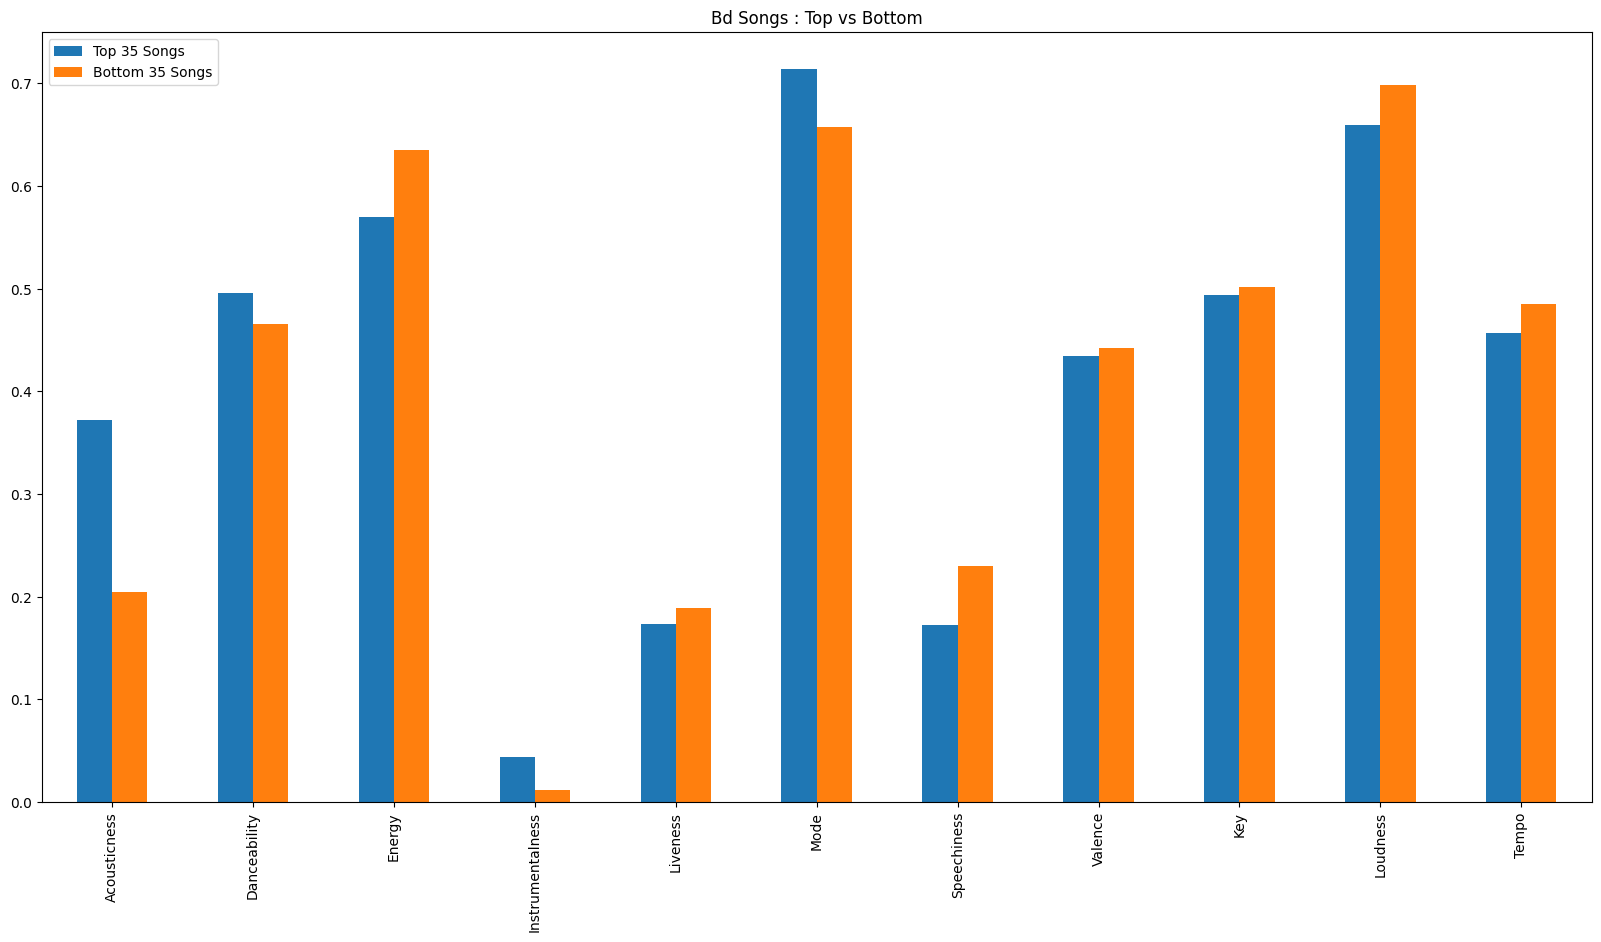

In [53]:
# Top 20
check = bd.sort_values(by = 'Popularity',ascending=False).head(35)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
top_20 = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Top 35 Songs'])

# Mid 20
# check = audiodf[audiodf['Popularity'].between(audiodf['Popularity'].quantile(0.45),audiodf['Popularity'].quantile(0.55))]
# check = check[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence']].head(20)
# check = check.T
# mid_20 = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Mid 20 Songs'])

# Bottom 20
check = bd.sort_values(by = 'Popularity',ascending=False).tail(35)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
bottom_20 = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Bottom 35 Songs'])

# top_bottom = pd.concat([top_20,mid_20, bottom_20], axis = 1)
top_bottom = pd.concat([top_20, bottom_20], axis = 1)

top_bottom.plot(title = 'Bd Songs : Top vs Bottom', figsize=(20,10),linewidth=2,kind = 'bar' )

<AxesSubplot: >

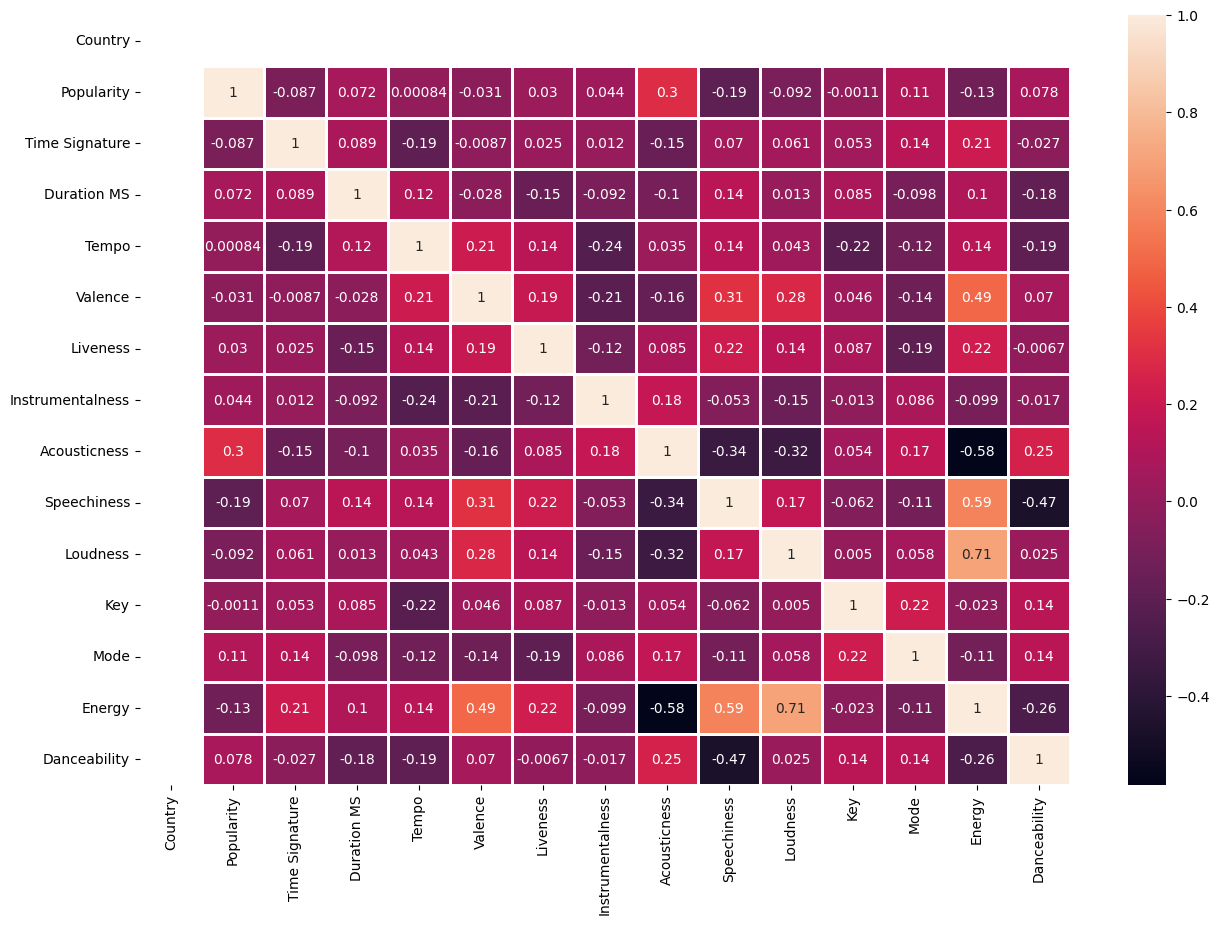

In [55]:
fig, ax = plt.subplots(figsize=(15,10))      
sns.heatmap(bd.corr(), annot=True,linewidths=.9, ax=ax)